# Hello World de Redes Neuronales con Keras

Objetivos de este cuaderno:
- Entender visualmente las funciones de activación más típicas.
- Cargar un dataset real que ya viene en Keras (Fashion MNIST).
- Construir una red neuronal completamente conectada (sin convoluciones).
- Probar a cambiar optimizadores, funciones de pérdida, funciones de activación, etc.

Más info: https://www.tensorflow.org/datasets/catalog/fashion_mnist?hl=es


In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Si te da error, prueba a hacer el pip install a las librerías que te fallen
import tensorflow as tf
import keras                     

# Para que los gráficos se vean más bonitos
plt.style.use("seaborn-v0_8")

## 1. Visualizando funciones de activación

Vamos a dibujar algunas funciones de activación:

- Sigmoid
- ReLU


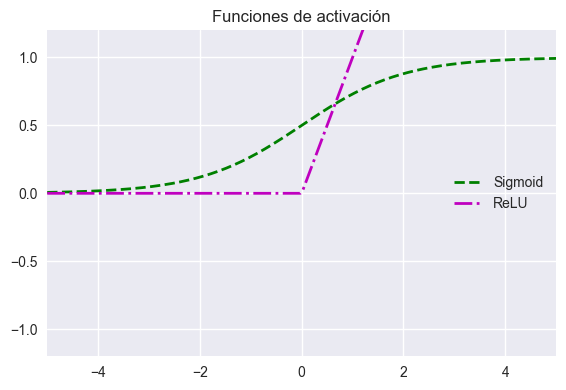

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11, 4))

# Activaciones
plt.subplot(1, 2, 1)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=10)
plt.title("Funciones de activación", fontsize=12)
plt.axis([-5, 5, -1.2, 1.2])

plt.tight_layout()
plt.show()

## 2. Cargando el dataset de Keras: Fashion MNIST

Fashion MNIST es como el clásico MNIST de números, pero con ropa:
Características principales:

- **Tipo de dato:** imágenes en escala de grises.
- **Tamaño de cada imagen:** 28 × 28 píxeles.
- **Forma en memoria:** una matriz 2D de 28 filas × 28 columnas, donde cada número indica cuánta “tinta” hay en ese píxel (0 = negro, 255 = blanco).
- **Número de clases:** 10 tipos de prendas diferentes.
- **Número de ejemplos:**
  - 60.000 imágenes de entrenamiento.
  - 10.000 imágenes de test.

Las 10 clases de Fashion MNIST son:

- 0 → Camiseta/Top  
- 1 → Pantalón  
- 2 → Jersey  
- 3 → Vestido  
- 4 → Abrigo  
- 5 → Sandalia  
- 6 → Camisa  
- 7 → Zapatilla deportiva  
- 8 → Bolso  
- 9 → Bota  


In [5]:
# Cargamos el dataset directamente desde Keras
(fashion_x_train, fashion_y_train), (fashion_x_test, fashion_y_test) = keras.datasets.fashion_mnist.load_data()

print("Tamaño de x_train:", fashion_x_train.shape)
print("Tamaño de y_train:", fashion_y_train.shape)
print("Tamaño de x_test:", fashion_x_test.shape)
print("Tamaño de y_test:", fashion_y_test.shape)

Tamaño de x_train: (60000, 28, 28)
Tamaño de y_train: (60000,)
Tamaño de x_test: (10000, 28, 28)
Tamaño de y_test: (10000,)


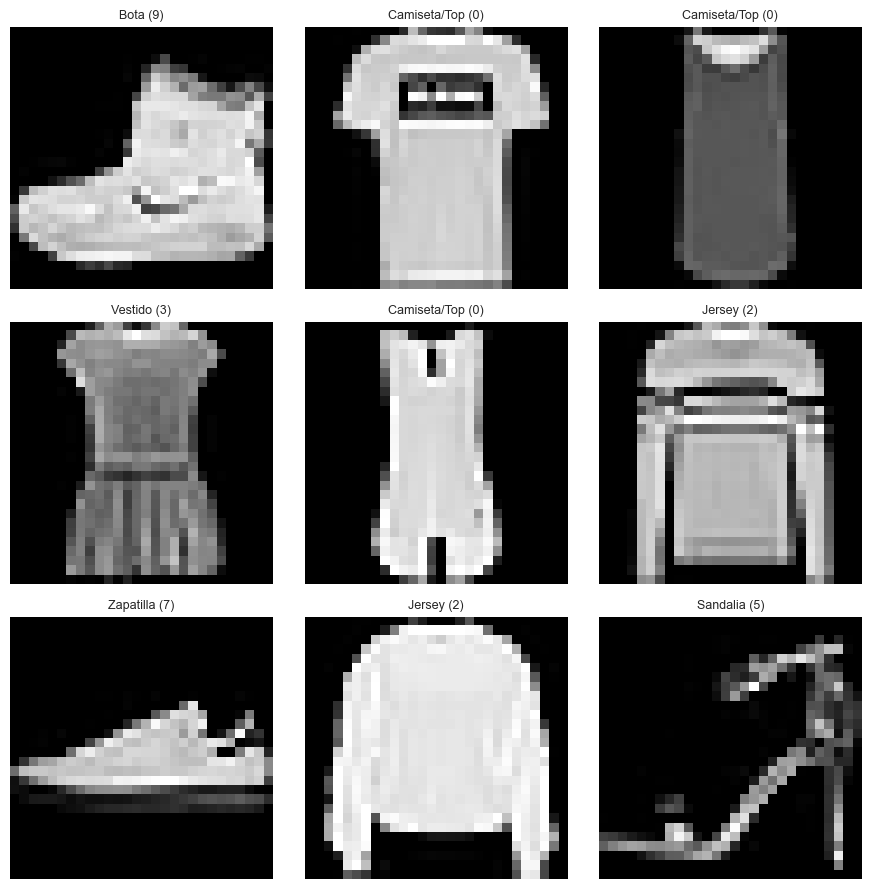

In [6]:
# Etiquetas de las clases para mostrar los nombres
class_names = [
    "Camiseta/Top", "Pantalón", "Jersey", "Vestido",
    "Abrigo", "Sandalia", "Camisa", "Zapatilla",
    "Bolso", "Bota"
]

# Visualizamos algunos ejemplos
plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(fashion_x_train[i], cmap="gray")
    label = fashion_y_train[i]
    plt.title(f"{class_names[label]} ({label})", fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()

## 3. Preparar los datos para la red neuronal

Pasos:
- Escalar los píxeles a valores entre 0 y 1.
- "Aplanar" las imágenes 28x28 a vectores de 784 componentes.
- Separar un pequeño conjunto de validación a partir de entrenamiento.


In [7]:
# Normalización: de [0, 255] a [0, 1]
x_train = fashion_x_train.astype("float32") / 255.0
x_test = fashion_x_test.astype("float32") / 255.0

# Aplanamos: (num_imágenes, 28, 28) -> (num_imágenes, 784)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

print("Nueva forma de x_train:", x_train.shape)
print("Nueva forma de x_test:", x_test.shape)

# Creamos un conjunto de validación sencillo
# (por ejemplo, las primeras 5.000 muestras para validación)
x_val = x_train[:5000]
y_val = fashion_y_train[:5000]

x_train_small = x_train[5000:]
y_train_small = fashion_y_train[5000:]

print("x_train_small:", x_train_small.shape)
print("x_val:", x_val.shape)

Nueva forma de x_train: (60000, 784)
Nueva forma de x_test: (10000, 784)
x_train_small: (55000, 784)
x_val: (5000, 784)


## 4. Definir la arquitectura de la red

Vamos a crear una red totalmente conectada con Keras:

- Capa de entrada: 784 neuronas (los 28x28 píxeles aplanados).
- Una o dos capas ocultas con activación ReLU.
- Capa de salida con 10 neuronas y `activation="softmax"` (10 clases).

Tenéis que probar a:
- Cambiar el número de neuronas en las capas.
- Cambiar la función de activación de las capas ocultas.
- Cambiar la activación de la capa de salida (softmax ↔ otras según el problema).
- Cambiar el optimizador y la función de pérdida más abajo.


In [41]:
from keras import layers
from keras.utils import plot_model

n_features = x_train_small.shape[1]
n_classes = 10

# Hiperparámetros "fáciles de tocar" por el alumno
hidden_units_1 = 128
hidden_units_2 = 96      # puedes poner None si quieres quitar esta capa
activation_hidden = "relu"  # prueba con "sigmoid", "tanh", etc.
activation_output = "softmax"  # en clasificación multiclase, softmax es lo estándar

# Definimos el modelo Sequential (pila lineal de capas)
model = keras.Sequential()

# Capa de entrada + primera capa oculta
model.add(layers.Input(shape=(n_features,)))
model.add(layers.Dense(hidden_units_1, activation=activation_hidden))

# Segunda capa oculta opcional
if hidden_units_2 is not None:
    model.add(layers.Dense(hidden_units_2, activation=activation_hidden))

# Capa de salida
model.add(layers.Dense(n_classes, activation=activation_output))

# Mostramos el resumen
model.summary()

# Dibujamos el modelo a un archivo PNG
# (si da error, puede que falte instalar graphviz/pydot en tu entorno)
plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 96)             │        12,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,834 (444.66 KB)

 Trainable params: 113,834 (444.66 KB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.


## 5. Compilar el modelo: optimizador, función de pérdida y métricas

Aquí respondemos a varias preguntas típicas:

- **¿Qué es el optimizador?**  
  Es el algoritmo que actualiza los pesos de la red para minimizar la pérdida.
  Ejemplos: `"sgd"`, `"adam"`, `"rmsprop"`, etc.

- **¿Qué es la función de pérdida (`loss`)?**  
  Es la medida de "error" que el modelo intenta minimizar.  
  Para clasificación multiclase con etiquetas 0,1,2… se suele usar
  `"sparse_categorical_crossentropy"`.

- **¿Qué son las métricas (`metrics`)?**  
  Son indicadores para monitorizar el rendimiento (por ejemplo, `accuracy`).

In [53]:
# Puedes cambiar estos valores y volver a entrenar para ver qué pasa
optimizer_name = "adamax"  # prueba con "sgd", "rmsprop", "adamax", etc.
loss_name = "sparse_categorical_crossentropy"  # problema de clasificación multiclase
metrics_list = ["accuracy"]

model.compile(
    optimizer=optimizer_name,
    loss=loss_name,
    metrics=metrics_list
)

## 6. Entrenamiento del modelo

Aquí aparecen conceptos importantes:

- **epochs**: cuántas veces ve el modelo TODO el conjunto de entrenamiento.
- **batch_size**: número de ejemplos que se usan en cada actualización de pesos.
- **validation_data**: datos con los que comprobamos si el modelo se está sobreajustando.
- **verbose**:
  - `0` → no muestra nada.
  - `1` → barra de progreso (suele ser el más cómodo).
  - `2` → una línea por epoch, más compacto.

Juega con estos parámetros para ver cómo cambia el entrenamiento.


In [54]:
epochs = 10       # prueba con 5, 10, 20...
batch_size = 32   # prueba con 16, 64...

history = model.fit(
    x_train_small, y_train_small,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val),
    verbose=1
)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9178 - loss: 0.2251 - val_accuracy: 0.8962 - val_loss: 0.3491
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9218 - loss: 0.2112 - val_accuracy: 0.8950 - val_loss: 0.3552
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9228 - loss: 0.2036 - val_accuracy: 0.8964 - val_loss: 0.3565
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9259 - loss: 0.1981 - val_accuracy: 0.8966 - val_loss: 0.3468
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9271 - loss: 0.1939 - val_accuracy: 0.8944 - val_loss: 0.3622
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9281 - loss: 0.1904 - val_accuracy: 0.8924 - val_loss: 0.3676
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9300 - loss: 0.1865 - val_accuracy: 0.8976 - val_loss: 0.3537
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9309 - loss: 0.1821 - 

## 7. Visualizar la evolución del entrenamiento

Vamos a dibujar:
- La pérdida de entrenamiento y validación por epoch.
- La accuracy de entrenamiento y validación por epoch (si está disponible).


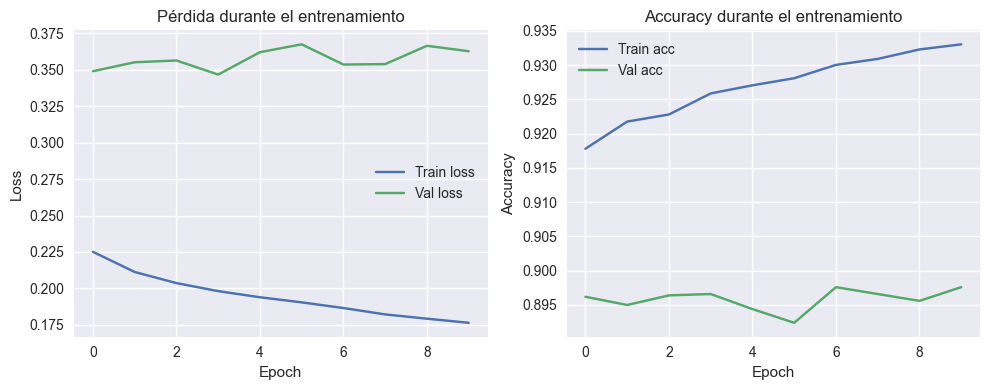

In [55]:
history_dict = history.history
history_dict.keys()

# Pérdida (loss)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history_dict["loss"], label="Train loss")
plt.plot(history_dict["val_loss"], label="Val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Pérdida durante el entrenamiento")
plt.legend()
plt.grid(True)

# Accuracy (si existe)
if "accuracy" in history_dict:
    plt.subplot(1, 2, 2)
    plt.plot(history_dict["accuracy"], label="Train acc")
    plt.plot(history_dict["val_accuracy"], label="Val acc")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy durante el entrenamiento")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

## 8. Evaluar en el conjunto de test

Ahora evaluamos el modelo final sobre datos que no se han usado ni para entrenar
ni para validar: el conjunto de test.


In [56]:
test_loss, test_acc = model.evaluate(x_test, fashion_y_test, verbose=0)
print(f"Pérdida en test: {test_loss:.4f}")
print(f"Accuracy en test: {test_acc:.4f}")

Pérdida en test: 0.3802
Accuracy en test: 0.8921


### 8.1. Probar la Red Neuronal


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Índice de la imagen: 0
Etiqueta real     => 9 (Bota)
Predicción modelo => 9 (Bota)


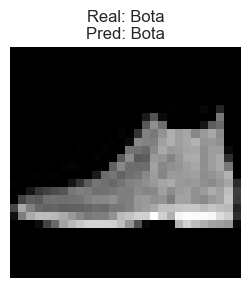

In [18]:
# Probar la red neuronal con una imagen concreta del conjunto de test

# 1. Cambia este índice (0, 1, 2, ..., len(x_test)-1) => Este índice es la imagen que quieres meter en tu red neuronal
idx = 0  # prueba con 0, 10, 1234, etc.

# 2. Preparamos la imagen para el modelo
#    - x_test ya está normalizado y aplanado (shape: [num_imágenes, 784])
img_para_modelo = x_test[idx].reshape(1, -1)  # (1, 784)

# 3. Hacemos la predicción
pred_probs = model.predict(img_para_modelo)
pred_clase = np.argmax(pred_probs, axis=1)[0]

# 4. Obtenemos la etiqueta real
true_clase = fashion_y_test[idx]

print(f"Índice de la imagen: {idx}")
print(f"Etiqueta real     => {true_clase} ({class_names[true_clase]})")
print(f"Predicción modelo => {pred_clase} ({class_names[pred_clase]})")

# 5. Mostramos la imagen original en 28x28
plt.figure(figsize=(3, 3))
plt.imshow(fashion_x_test[idx], cmap="gray")
plt.title(f"Real: {class_names[true_clase]}\nPred: {class_names[pred_clase]}")
plt.axis("off")
plt.show()

## 9. Ejercicios propuestos para trastear

Usa este cuaderno como "laboratorio" y prueba a modificar lo siguiente:
métricas estandard:
Pérdida en test: 0.3432
Accuracy en test: 0.8828

1. **Capas y neuronas**
   - Cambia `hidden_units_1` y `hidden_units_2`.
		He quitado hiddent_units_2 y he aumentado hidden_units_1 a 256, he recompilado y entrenado el modelo otra vez y he conseguido estas métricas
			Pérdida en test: 0.3391
			Accuracy en test: 0.8814
   - Añade una tercera capa oculta.
		He vuelto a añadir hidden_units_2, ahora con 128 nodos y he añadido una nueva capa hidden_units_3 = 96 y he conseguido lo siguiente:
			Pérdida en test: 0.3434
			Accuracy en test: 0.8781
	
	Vemos que con una sola capa funciona ligeramente mejor

2. **Funciones de activación**
   - Cambia `activation_hidden` a `"sigmoid"` o `"tanh"`.
		Con la función sigmoide:
			Pérdida en test: 0.3393
			Accuracy en test: 0.8739
		Con la función tanh:
			Pérdida en test: 0.3362
			Accuracy en test: 0.8823
   - Observa si el entrenamiento va más lento o si cambia la accuracy.
		Con la función sigmoide tarda lo mismo y optenemos una accuracy similar.
		Con la función tanh también tarda lo mismo y obtenemos una accuracy ligeramente mejor, pero nada notable

3. **Optimizadores**
   - Cambia `optimizer_name` a `"sgd"`, `"rmsprop"`, `"adamax"`, etc.
		Con el optimizador "sgd":
			Pérdida en test: 0.3850
			Accuracy en test: 0.8598
		Con el optimizador "rmsprop":
			Pérdida en test: 0.4089
			Accuracy en test: 0.8697
		Con el optimizador "adamax":
			Pérdida en test: 0.3802
			Accuracy en test: 0.8921
   - Compara la velocidad y el rendimiento final.
		Los 3 tardan lo mismo, pero el adamax consigue un rendimiento un poco mayor
		
4. **Funciones de pérdida**
   - Piensa: ¿qué pasaría si usara una `loss` de regresión aquí? ¿tendría sentido?

5. **Parámetros de entrenamiento**
   - Cambia `epochs` y `batch_size`.
   - Observa si el modelo sobreajusta (train muy bien, val/test peor).